# <center>Laboratorium 6<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

In [2]:
f1 = lambda x: np.sign(x) * x + x ** 2
f2 = lambda x: np.sign(x) * x ** 2
f3 = lambda x: abs(np.sin(5 * x)) ** 3
f4_1 = lambda x: 1 / (1 + (x ** 2))
f4_2 = lambda x: 1 / (1 + 25 * (x ** 2))
f4_3 = lambda x: 1 / (1 + 100 * (x ** 2))
f5 = lambda x: np.sign(x)

***Zadanie 1.***  

Zaimlementować wzór barycentryczny podany na wykładzie jako funkcję barycentric_inte w main.py. Następnie dla funkcji ciągłej nieróżniczkowalnej z [Zadania domoego 2] przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* jak i za zaimplementowanego wzoru barycentrycznego. W tym celu należy:

 - Wykonać w węzłach Czebyszewa (zaimplementowanych w ramach zadania domowego) interpolację rzędu 10, 100, 1000, 10000, 100000.
 - Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  
 - Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  


Przykład użycia funkcji barycentric_interpolate:

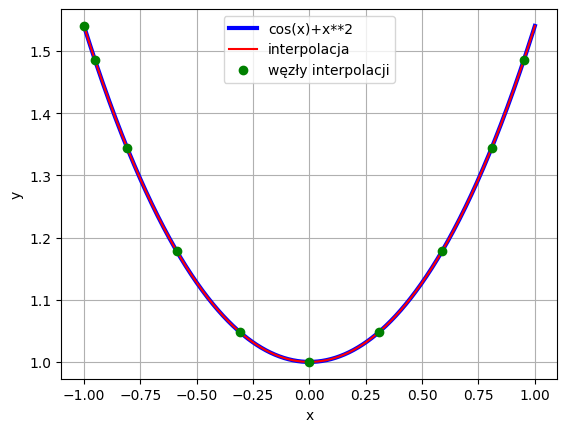

In [3]:
# funkcja do interpolacji
f = lambda x: np.cos(x) + x ** 2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# węzły Czebyszewa
interpolation_nodes_number = 10

xch = np.cos(np.linspace(1, interpolation_nodes_number, interpolation_nodes_number) * np.pi / interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label='cos(x)+x**2')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

In [4]:
n = [10, 100, 1000, 10000]
x = np.linspace(-1, 1, 1000)

inter = []
nodes = []
weights = []
f1_n = []
inter_s = []

for i in range(len(n)):
    nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f1_n.append(f1(nodes[i]))
    inter.append(main.barycentric_inte(nodes[i], f1_n[i], weights[i], x))
    inter_s.append(barycentric_interpolate(nodes[i], f1_n[i], x))

/Users/lukasz/GitHub/laboratorium-6-lukaszfilo-agh/main.py:77: RuntimeWarning: divide by zero encountered in divide
  le = wi / (x - xi)
/Users/lukasz/GitHub/laboratorium-6-lukaszfilo-agh/main.py:78: RuntimeWarning: invalid value encountered in double_scalars
  y.append(yi @ le / sum(le))


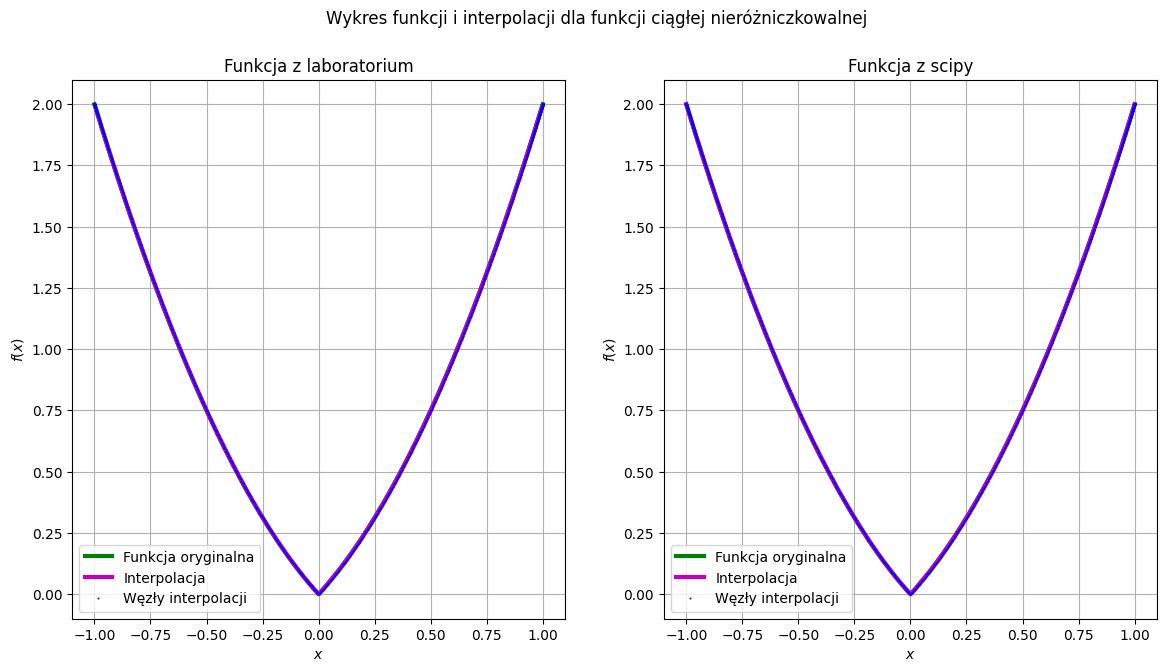

In [5]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
fig1.suptitle('Wykres funkcji i interpolacji dla funkcji ciągłej nieróżniczkowalnej')

ax1.plot(x, f1(x), 'g', label='Funkcja oryginalna', linewidth=3)
ax1.plot(x, inter[2], 'm', label='Interpolacja', linewidth=3)
ax1.plot(nodes[2], f1(nodes[2]), 'b.', label='Węzły interpolacji', markersize=1)
ax1.set(xlabel='$x$', ylabel='$f(x)$')
ax1.set_title('Funkcja z laboratorium')
ax1.legend()
ax1.grid()

ax2.plot(x, f1(x), 'g', label='Funkcja oryginalna', linewidth=3)
ax2.plot(x, inter_s[2], 'm', label='Interpolacja', linewidth=3)
ax2.plot(nodes[2], f1(nodes[2]), 'b.', label='Węzły interpolacji', markersize=1)
ax2.set(xlabel='$x$', ylabel='$f(x)$')
ax2.set_title('Funkcja z scipy')
ax2.legend()
ax2.grid()

In [6]:
time_avg_s = np.zeros((len(n)))
time_std_dev_s = np.zeros((len(n)))
print('Pomiar czasu dla funkcji z modułu scipy:')
for i in range(len(n)):
    print('N: ', n[i])
    print('Czas wykonania: ')
    saved_timing = %timeit -r 5 -n 10 -o barycentric_interpolate(nodes[i], f1_n[i], x)
    time_avg_s[i] = saved_timing.average
    time_std_dev_s[i] = saved_timing.stdev
    print('---------------------------------------------------------')

Pomiar czasu dla funkcji z modułu scipy:
N:  10
Czas wykonania: 
338 µs ± 46.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N:  100
Czas wykonania: 
1.64 ms ± 77.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N:  1000
Czas wykonania: 
21.9 ms ± 849 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N:  10000
Czas wykonania: 
538 ms ± 826 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------


In [7]:
time_avg = np.zeros((len(n)))
time_std_dev = np.zeros((len(n)))
print('Pomiar czasu dla funkcji z laboratorium:')
for i in range(len(n)):
    print('N: ', n[i])
    print('Czas wykonania: ')
    saved_timing = %timeit -r 5 -n 10 -o main.barycentric_inte(nodes[i], f1_n[i], weights[i], x)
    time_avg[i] = saved_timing.average
    time_std_dev[i] = saved_timing.stdev
    print('---------------------------------------------------------')

Pomiar czasu dla funkcji z laboratorium:
N:  10
Czas wykonania: 
4.93 ms ± 203 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N:  100
Czas wykonania: 
12.2 ms ± 215 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N:  1000
Czas wykonania: 
83.4 ms ± 388 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------
N:  10000
Czas wykonania: 
792 ms ± 5.12 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------


Text(0.5, 1.0, 'Wykres zależności czasu obliczenia interpolacji od rzędu interpolacji')

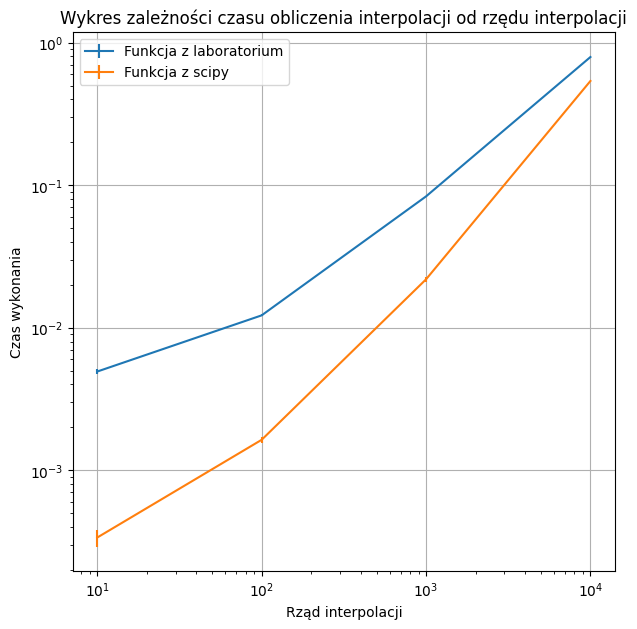

In [8]:
fig2, ax1 = plt.subplots(figsize=(7, 7))
ax1.errorbar(n, time_avg, time_std_dev, label='Funkcja z laboratorium')
ax1.errorbar(n, time_avg_s, time_std_dev_s, label='Funkcja z scipy')
ax1.grid()
ax1.legend()
ax1.set(yscale='log', xscale='log')
ax1.set(xlabel='Rząd interpolacji', ylabel='Czas wykonania')
ax1.set_title('Wykres zależności czasu obliczenia interpolacji od rzędu interpolacji')

***Wnioski***
Przeprowadzona interpolacja funkcji działa poprawnie zarówno przy użyciu funkcji z biblioteki scipy jak i funckji zaimplementowanej przez nas. Czasy ich wykonania są podobne i jak można było się spodziewać wraz ze wzrostem rzędu interpolacji rośnie czas jej wykonania. Nie wykonałem interpolacji rzędu 100000, ponieważ czas jej wykonania był bardzo długi, przez co nie realne było zbadanie tak wysokiego rzędu.

***Zadanie 2.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania domowego 2]. Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 

W tym celu należy:
- wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów (nie będącymi węzłami interpolacji np. punkty równoodległe),
- wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu, maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
- dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu,
- dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

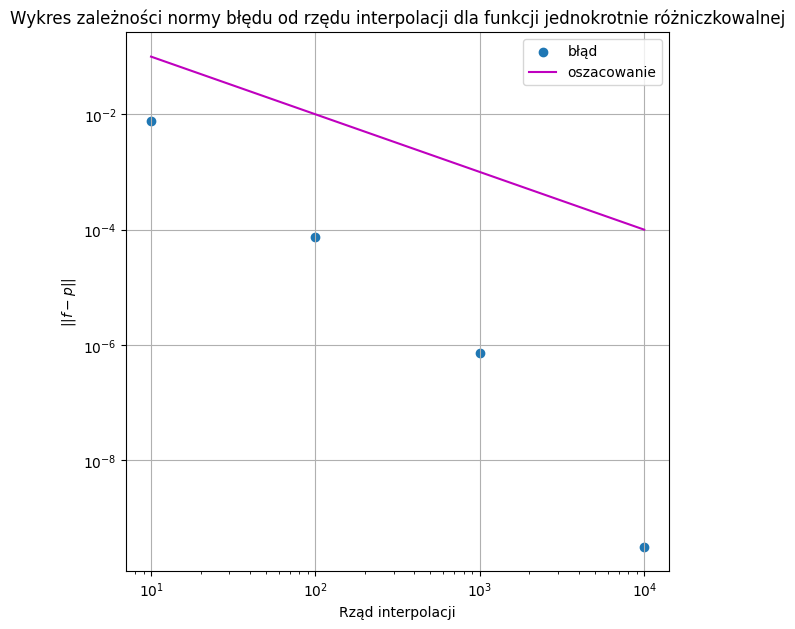

In [9]:
x = np.linspace(-0.9, 0.9, 1000)

inter = []
nodes = []
weights = []
f2_n = []
l_inf1 = []
y2 = f2(x)
n_v = []

for i in range(len(n)):
    nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f2_n.append(f2(nodes[i]))
    inter.append(main.barycentric_inte(nodes[i], f2_n[i], weights[i], x))
    l_inf1.append(main.L_inf(y2, inter[i]))
    n_v.append(1 / n[i])

fig3, ax = plt.subplots(figsize=(7, 7))
ax.scatter(n, l_inf1, label='błąd')
ax.plot(n, n_v, 'm', label='oszacowanie')
ax.set(xscale='log', yscale='log')
ax.legend()
ax.set(xlabel='Rząd interpolacji', ylabel='$||f-p||$')
ax.grid()
ax.set_title('Wykres zależności normy błędu od rzędu interpolacji dla funkcji jednokrotnie różniczkowalnej');

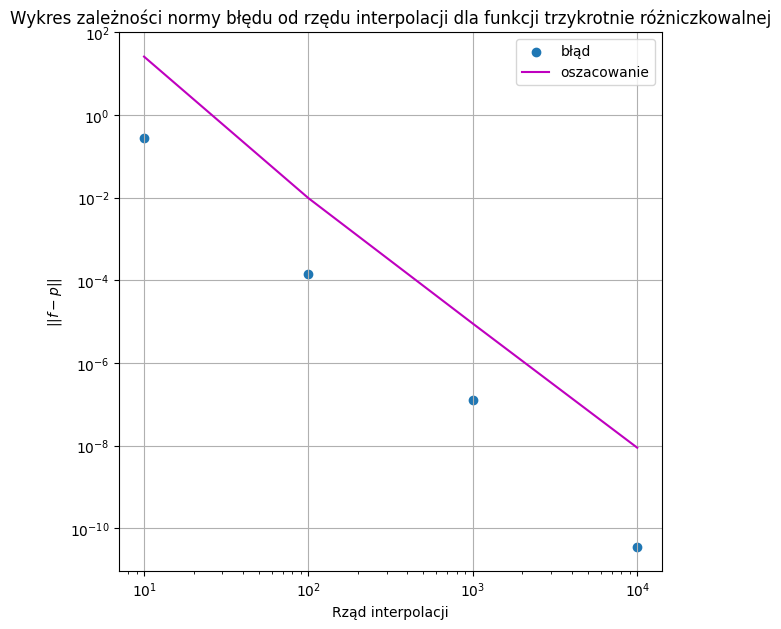

In [10]:
inter = []
nodes = []
weights = []
f3_n = []
l_inf2 = []
y3 = f3(x)
n_v = []

for i in range(len(n)):
    nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f3_n.append(f3(nodes[i]))
    inter.append(main.barycentric_inte(nodes[i], f3_n[i], weights[i], x))
    l_inf2.append(main.L_inf(y3, inter[i]))
    n_v.append(4 * 2.102e4 / 3 / np.pi / (n[i] - 3) ** 3)

fig4, ax = plt.subplots(figsize=(7, 7))
ax.scatter(n, l_inf2, label='błąd')
ax.plot(n, n_v, 'm', label='oszacowanie')
ax.set(xscale='log', yscale='log')
ax.legend()
ax.set(xlabel='Rząd interpolacji', ylabel='$||f-p||$')
ax.grid()
ax.set_title('Wykres zależności normy błędu od rzędu interpolacji dla funkcji trzykrotnie różniczkowalnej');

***Wnioski***
Z analizy wykresów można dość jasno wywnioskować, że im wyższy rząd interpolacji, tym dokładniejsza jej interpolowana funkcja. Wraz ze wzrostem liczby węzłów poprawia się jakość interpolacji.

***Zadanie 3.***  
Dla funkcji nieciągłej z [Zadania domowego 2] przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

In [11]:
n = [x for x in range(1, 51)]
x = np.linspace(-0.9, 0.9, 1000)
y5 = f5(x)
nodes = []
weights = []
f5_n = []
inter = []

err_odd = []
err_even = []
n_odd = []
n_even = []

for i in range(len(n)):
    nodes.append(main.chebyshev_nodes(n[i]))
    weights.append(main.bar_czeb_weights(n[i]))
    f5_n.append(f5(nodes[i]))
    inter.append(main.barycentric_inte(nodes[i], f5_n[i], weights[i], x))
    if n[i] % 2 == 0:
        err_even.append(main.L_inf(y5, inter[i]))
        n_even.append(n[i])
    else:
        err_odd.append(main.L_inf(y5, inter[i]))
        n_odd.append(n[i])

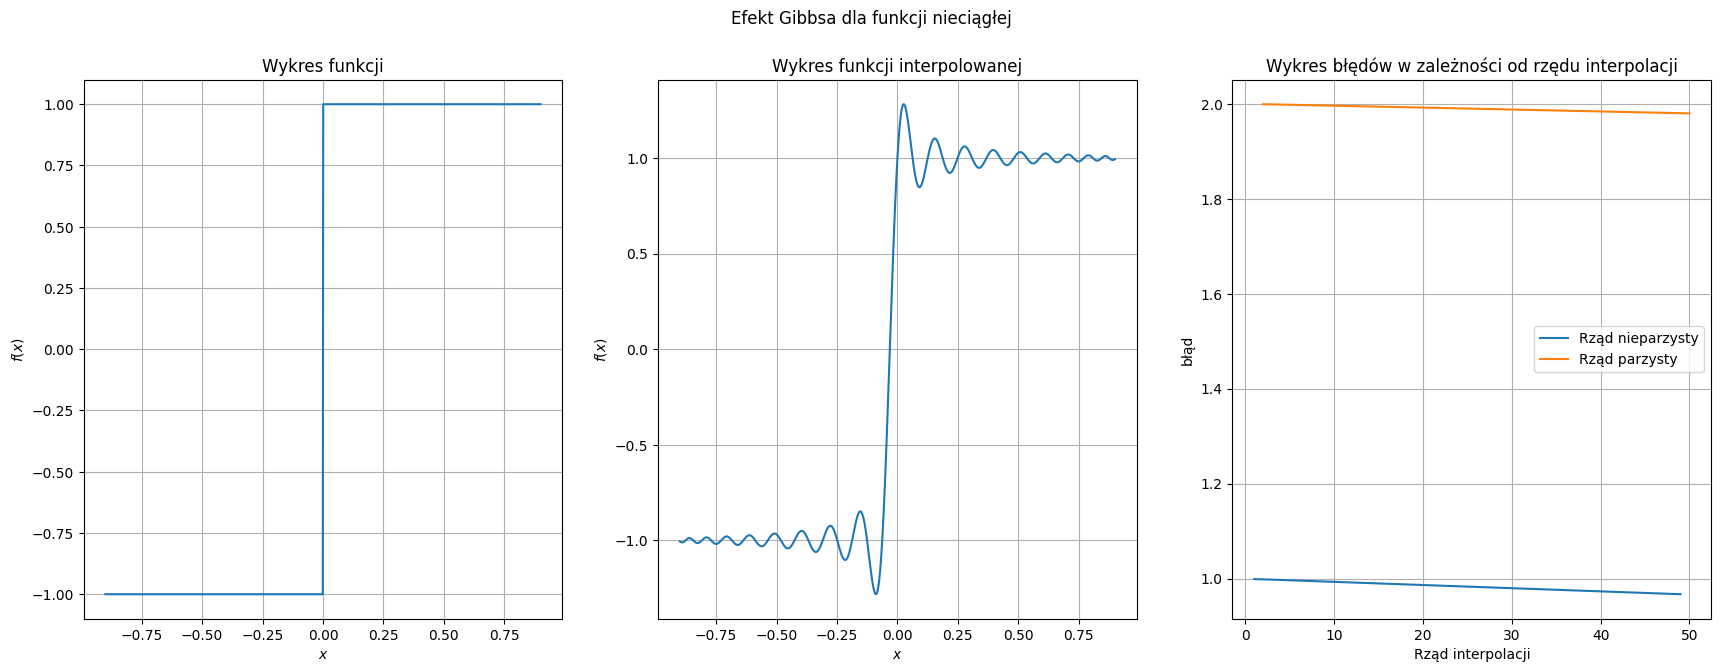

In [12]:
fig5, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
fig5.suptitle('Efekt Gibbsa dla funkcji nieciągłej')

ax1.plot(x, y5)
ax1.set(xlabel='$x$', ylabel='$f(x)$')
ax1.set_title('Wykres funkcji')
ax1.grid()

ax2.plot(x, inter[49])
ax2.set(xlabel='$x$', ylabel='$f(x)$')
ax2.set_title('Wykres funkcji interpolowanej')
ax2.grid()

ax3.plot(n_odd, err_odd, label='Rząd nieparzysty')
ax3.plot(n_even, err_even, label='Rząd parzysty')
ax3.set(xlabel='Rząd interpolacji', ylabel='błąd')
ax3.set_title('Wykres błędów w zależności od rzędu interpolacji')
ax3.grid()
ax3.legend();

***Wnioski***
Efekt Gibbsa pojawia się podczas interpolacji funkcji nieciągłej. W okolicach jej nieciągłości pojawiają się oscylacje, które wpływają na niedokładne odwzorowanie funkcji co widoczne jest na wykresach powyżej.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)